In [35]:
# Modelo ARDL

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.vector_ar.vecm import coint_johansen

import plotly.express as px 
import matplotlib
#%matplotlib inline 
#assert matplotlib.__version__ == "3.1.0"

In [37]:
data = pd.read_csv('data1.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')
data.columns


Index(['zl_rexm', 'diesel', 'hipotecarios', 'consumo', 'itm', 'zl_mtm',
       'entrada', 'pollo', 'licor', 'pconst_interior', 'f_electricidad',
       'deuda', 'fob', 'zl_impm', 'acp_pm', 'gastotur', 'ibm', 'iim', 'banano',
       'gasolina', 'itmbs', 'apuestas', 'depósitos', 'préstamos', 'comercio',
       'construcción', 'itdm', 'intm', 'activan', 'pasivan', 'dp_pib',
       'pib_corr', 'ingresos_ind', 'ingresos_cmayor', 'ingresos_cmenor',
       'ingresos_hot', 'ingresos_serv', 'ingresos_tot', 'rem_ind',
       'rem_cmayor', 'rem_cmenor', 'rem_hot', 'rem_serv', 'rem_tot', 'ied',
       'ied_empresas', 'ied_bancos', 'imae', 'imae_s', 'bvpsi', 'acp_tbm',
       'acp_tnm', 'mcp', 'visitas', 'vacuno', 'porcino', 'cerveza', 'pconst',
       'pconst_cdad', 'concreto', 'cemento', 'autos', 'g_electricidad',
       'primas', 'activar', 'pasivar', 'pib_cons', 'pib_const_d',
       'pib_const_e', 'pib_const_f', 'pib_const_g', 'pib_const_i',
       'pib_const_j', 'pib_const_m', 'pib_const_a', 

## Modelaje sin pandemia

In [38]:
data11 = data['2014-02-01':'2020-03-01']
data11.tail()

,zl_rexm,diesel,hipotecarios,consumo,itm,zl_mtm,entrada,pollo,licor,pconst_interior,...,pib_const_d,pib_const_e,pib_const_f,pib_const_g,pib_const_i,pib_const_j,pib_const_m,pib_const_a,pib_const_c,pib_const_h
mes_ano,,,,,,,,,,,,,,,,,,,,,
2019-11-01,1.908437,1.687143,4.752651,0.010207,1.159008,7.311686,6.489205,9.572689,6.970730,10.462217,...,-0.038362,-0.038325,-0.038501,-0.038514,-0.038501,-0.038435,-0.037599,-0.221838,-0.223200,0.041685
2019-12-01,1.799792,1.713972,4.753268,-0.002305,1.663804,7.238138,6.616065,9.679531,7.020459,10.672067,...,0.006835,0.006828,0.006860,0.006862,0.006860,0.006848,0.006697,0.601842,0.604935,0.233267
2020-01-01,1.703459,1.710006,4.756502,0.000374,1.270463,7.197585,6.634633,9.607572,7.098376,11.497599,...,-0.056213,-0.033656,0.008925,-0.100001,-0.064076,-0.101889,0.102986,-0.607858,-0.338087,-0.004906
2020-02-01,1.679609,1.730987,4.760495,0.005924,1.235554,7.091243,5.857933,9.597234,6.945051,10.451436,...,-0.004039,-0.004035,-0.004055,-0.004056,-0.004055,-0.004046,-0.003969,0.021292,0.021491,-0.143011
2020-03-01,1.659341,1.617844,4.768669,0.005476,1.172844,6.971856,5.880533,9.626745,6.823286,10.646710,...,0.095921,0.095840,0.096288,0.096305,0.096277,0.096092,0.094332,0.155511,0.156843,0.021967


In [39]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [40]:
#cointegration_test(data11)

In [41]:
#pip install statsmodels
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

In [42]:
# Muchas variables se decide buscar el mejor lag por subconjunto

In [43]:
 from sklearn.model_selection import train_test_split
# Método de la exclusión
 X_train, X_test, y_train, y_test = train_test_split(data11, 
                                                    data11.activar,
                                                    random_state=0)

In [44]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

select = RFE(RandomForestRegressor(random_state=42), 
             n_features_to_select=10)
select.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)

In [45]:
d = { 'variable':data11.columns,'decision':select.support_}
select_RFE = pd.DataFrame(data =d)
select_RFE.head()
seleccionadas = select_RFE[select_RFE['decision']==True]
seleccionadas

,variable,decision
7,pollo,True
9,pconst_interior,True
13,zl_impm,True
25,construcción,True
27,intm,True
49,bvpsi,True
54,vacuno,True
62,g_electricidad,True
64,activar,True
65,pasivar,True


In [46]:
seleccionadas = ['pollo','pconst_interior','zl_impm','construcción','intm','bvpsi','vacuno',
                 'g_electricidad','activar','pasivar']
data2 = data11[seleccionadas]

In [49]:
sel_res = ardl_select_order(
    data2.activar,6, data2[['pollo','pconst_interior','zl_impm','construcción']], 6, ic="aic", trend="c"
)
sel_res.dl_lags

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'pollo': [0, 1, 2], 'pconst_interior': [0, 1, 2], 'zl_impm': [0, 1, 2, 3, 4]}

In [51]:
sel_res = ardl_select_order(
    data2.activar,6, data2[['intm','bvpsi','vacuno', 'g_electricidad','pasivar']], 6, ic="aic", trend="c"
)
sel_res.dl_lags

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'vacuno': [0], 'g_electricidad': [0, 1], 'pasivar': [0, 1, 2, 3, 4]}

In [57]:
modelo = ARDL(
    data2.activar, 2,
    data2[['pollo', 'pconst_interior', 'zl_impm', 'vacuno', 'g_electricidad','pasivar']],
            {'pollo':2, 'pconst_interior':2, 'zl_impm':4, 'vacuno':0, 'g_electricidad':1,'pasivar':4},
    trend="c",
    seasonal=True,
    period= 12
).fit()
heterocedasticidad = modelo.test_heteroskedasticity()
normalidad = modelo.test_normality()
dw = durbin_watson(modelo.resid)
print('El valor de DW = ', dw)
print('Test de Heterocedasticidad',heterocedasticidad)
print('Test de Normalidad',normalidad)

El valor de DW =  2.2024629101232835
Test de Heterocedasticidad       ARCH-LM   P-value  DF
Lag                        
1    0.386783  0.533995   1
2    2.550605  0.279346   2
3    2.702703  0.439768   3
4    3.032409  0.552417   4
5    3.987872  0.551163   5
6    4.245136  0.643541   6
7    7.552726  0.373679   7
8    8.467150  0.389216   8
9    9.071176  0.430730   9
10   9.657196  0.471066  10
Test de Normalidad Jarque-Bera    1.050503
P-value        0.591407
Skewness       0.300639
Kurtosis       2.937903
dtype: float64


C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [58]:
modelo.summary()
#modelo.plot_diagnostics()
#modelo.resid.plot()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARDL Model Results                                    
===========================================================================================
Dep. Variable:                             activar   No. Observations:                   73
Model:             Seas. ARDL(2, 2, 2, 4, 0, 1, 4)   Log Likelihood                 308.274
Method:                            Conditional MLE   S.D. of innovations              0.003
Date:                             Fri, 22 Apr 2022   AIC                           -548.547
Time:                                     15:34:34   BIC                           -471.616
Sample:                                 07-01-2014   HQIC                          -517.954
                                      - 03-01-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0017      0.027     -0.064      0.950      -0.057       0.054
s(2,12)                0.0021      0.006      0.340      0.736      -0.010       0.015
s(3,12)                0.0067      0.005      1.467      0.151      -0.003       0.016
s(4,12)                0.0011      0.005      0.234      0.817      -0.009       0.011
s(5,12)                0.0066      0.004      1.517      0.138      -0.002       0.015
s(6,12)                0.0021      0.004      0.499      0.621      -0.006       0.011
s(7,12)                0.0063      0.005      1.286      0.206      -0.004       0.016
s(8,12)                0.0001      0.004      0.033      0.973      -0.007       0.008
s(9,12)                0.0015      0.005      0.281      0.780      -0.009       0.012
s(10,12)               0.0061      0.004      1.613      0.115      -0.002       0.014
s(11,12)               0.0035      0.005      0.685      0.497      -0.007       0.014
s(12,12)               0.0076      0.006      1.252      0.218      -0.005       0.020
activar.L1            -0.0952      0.168     -0.566      0.574      -0.435       0.245
activar.L2            -0.1863      0.146     -1.272      0.211      -0.483       0.110
pollo.L0               0.0005      0.001      0.801      0.428      -0.001       0.002
pollo.L1              -0.0008      0.001     -1.210      0.234      -0.002       0.001
pollo.L2               0.0008      0.001      1.064      0.294      -0.001       0.002
pconst_interior.L0    -0.0006      0.002     -0.326      0.746      -0.004       0.003
pconst_interior.L1    -0.0034      0.002     -1.933      0.061      -0.007       0.000
pconst_interior.L2     0.0035      0.002      2.126      0.040       0.000       0.007
zl_impm.L0            -0.0090      0.006     -1.415      0.165      -0.022       0.004
zl_impm.L1             0.0165      0.008      2.070      0.045       0.000       0.033
zl_impm.L2             0.0059      0.010      0.575      0.568      -0.015       0.027
zl_impm.L3             0.0138      0.009      1.495      0.143      -0.005       0.032
zl_impm.L4            -0.0128      0.008     -1.641      0.109      -0.029       0.003
vacuno.L0              0.0132      0.013      1.034      0.307      -0.013       0.039
g_electricidad.L0     -0.0148      0.027     -0.543      0.591      -0.070       0.040
g_electricidad.L1     -0.0142      0.035     -0.411      0.683      -0.084       0.056
pasivar.L0             0.4345      0.115      3.788      0.001       0.202       0.667
pasivar.L1             0.3198      0.146      2.192      0.035       0.024       0.615
pasivar.L2             0.2630      0.141      1.860      0.071      -0.023       0.549
pasivar.L3             0.1350      0.134      1.010      0.319      -0.136       0.406
pasivar.L4            -0.0414      0.116     -0.357      0.723      -0.276     

In [64]:
d = {'activar': data2.iloc[:88,9] ,'estimados': modelo.fittedvalues}
ajuste = pd.DataFrame(d)
fig = px.line(
    data_frame=ajuste, 
)
fig.update_layout(title='Ajuste Ene-2014, Mar-2020')
fig.show()

In [15]:
#ajuste.plot()

In [69]:
from sklearn.metrics import mean_absolute_error
neg_mae = mean_absolute_error(data2.iloc[:69,9], modelo.fittedvalues)
print(neg_mae)
from sklearn.metrics import mean_squared_error
neg_msr = mean_squared_error(data2.iloc[:69,9], modelo.fittedvalues)
print(neg_msr)
# No tomar encuenta por que se dispara cuando los valores son cercanos a 0
#from sklearn.metrics import mean_absolute_percentage_error
#neg_mape = mean_absolute_percentage_error(data2.iloc[:68,0], modelo.fittedvalues)
# print(neg_mape) 

0.005983536798284533
5.74162564828901e-05


In [70]:
# Evaluacion de Residuos

<AxesSubplot:xlabel='mes_ano'>

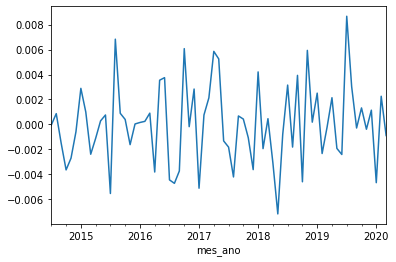

In [68]:
#modelo.plot_diagnostics()
modelo.resid.plot()

In [72]:
ver = modelo.resid.dropna().sort_values()
ver

mes_ano
2018-05-01   -0.007162
2015-07-01   -0.005527
2017-01-01   -0.005105
2016-08-01   -0.004714
2020-01-01   -0.004662
                ...   
2017-04-01    0.005852
2018-11-01    0.005932
2016-10-01    0.006072
2015-08-01    0.006829
2019-07-01    0.008665
Length: 69, dtype: float64

In [27]:
# Identificacion de dummies

In [75]:
residuos = pd.Series(modelo.resid)
residuos = residuos - residuos
#residuos

In [78]:
z = residuos['2018-05-01':'2018-04-01'] +1
z
d2018_05 = z+residuos
d2018_05 = d2018_05.fillna(0)

In [80]:
z = residuos['2019-07-01':'2019-07-01'] +1
z
d2019_07 = z+residuos
d2019_07 = d2019_07.fillna(0)

In [81]:
data2.columns

Index(['pollo', 'pconst_interior', 'zl_impm', 'construcción', 'intm', 'bvpsi',
       'vacuno', 'g_electricidad', 'activar', 'pasivar'],
      dtype='object')

In [82]:
data3 = pd.concat([data2,d2018_05,d2019_07], axis = 1)
data3.columns= ['pollo', 'pconst_interior', 'zl_impm', 'construcción', 'intm', 'bvpsi',
               'vacuno', 'g_electricidad', 'activar', 'pasivar', 'd2018_05','d2019_07']
data3['d2018_05'] = data3['d2018_05'].fillna(0)
data3['d2019_07'] = data3['d2019_07'].fillna(0)
data3.columns

Index(['pollo', 'pconst_interior', 'zl_impm', 'construcción', 'intm', 'bvpsi',
       'vacuno', 'g_electricidad', 'activar', 'pasivar', 'd2018_05',
       'd2019_07'],
      dtype='object')

In [83]:
modelo_1 = ARDL(
    data3.activar, 6,
    data3[['pollo', 'pconst_interior', 'zl_impm', 'construcción', 'intm', 'bvpsi',
               'vacuno', 'g_electricidad', 'activar', 'pasivar', 'd2018_05','d2019_07']],
            {'pollo':2, 'pconst_interior':2, 'zl_impm':4, 'vacuno':0, 'g_electricidad':1,
             'pasivar':4, 'd2018_05':0,'d2019_07':0},
    trend="c",
    seasonal=True,
    period= 12
).fit()
heterocedasticidad = modelo_1.test_heteroskedasticity()
normalidad = modelo_1.test_normality()
dw = durbin_watson(modelo_1.resid)
print('El valor de DW = ', dw)
print('Test de Heterocedasticidad',heterocedasticidad)
print('Test de Normalidad',normalidad)

El valor de DW =  2.0888219968303243
Test de Heterocedasticidad       ARCH-LM   P-value  DF
Lag                        
1    1.353514  0.244665   1
2    1.868187  0.392942   2
3    2.854465  0.414612   3
4    4.163187  0.384371   4
5    4.382078  0.495814   5
6    4.316456  0.633935   6
7    4.655304  0.701944   7
8    4.820298  0.776599   8
9    6.423657  0.696881   9
10   7.043819  0.721302  10
Test de Normalidad Jarque-Bera    0.074152
P-value        0.963603
Skewness       0.057685
Kurtosis       2.884885
dtype: float64


C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\ardl\model.py:158: SpecificationWarning:

exog contains variables that are missing from the order dictionary.  Missing keys: activar, bvpsi, construcción, intm.



In [84]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        ARDL Model Results                                       
=================================================================================================
Dep. Variable:                                   activar   No. Observations:                   73
Model:             Seas. ARDL(6, 2, 2, 4, 0, 1, 4, 0, 0)   Log Likelihood                 307.648
Method:                                  Conditional MLE   S.D. of innovations              0.002
Date:                                   Fri, 22 Apr 2022   AIC                           -535.296
Time:                                           15:44:27   BIC                           -447.108
Sample:                                       09-01-2014   HQIC                          -500.399
                                            - 03-01-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0024      0.025     -0.095      0.925      -0.054       0.049
s(2,12)                0.0065      0.006      1.018      0.317      -0.007       0.020
s(3,12)                0.0095      0.005      2.088      0.046       0.000       0.019
s(4,12)                0.0045      0.005      1.001      0.326      -0.005       0.014
s(5,12)                0.0051      0.005      1.080      0.289      -0.005       0.015
s(6,12)                0.0055      0.004      1.441      0.161      -0.002       0.013
s(7,12)                0.0105      0.005      2.203      0.036       0.001       0.020
s(8,12)                0.0019      0.004      0.544      0.591      -0.005       0.009
s(9,12)                0.0051      0.005      1.017      0.318      -0.005       0.015
s(10,12)               0.0059      0.003      1.756      0.090      -0.001       0.013
s(11,12)               0.0055      0.005      1.152      0.259      -0.004       0.015
s(12,12)               0.0104      0.006      1.748      0.091      -0.002       0.022
activar.L1            -0.1442      0.151     -0.955      0.348      -0.453       0.165
activar.L2            -0.3068      0.141     -2.179      0.038      -0.595      -0.018
activar.L3            -0.4568      0.142     -3.207      0.003      -0.749      -0.165
activar.L4            -0.2375      0.123     -1.932      0.064      -0.489       0.014
activar.L5            -0.1174      0.115     -1.022      0.316      -0.353       0.118
activar.L6            -0.0147      0.118     -0.125      0.902      -0.257       0.227
pollo.L0               0.0004      0.001      0.581      0.566      -0.001       0.002
pollo.L1              -0.0006      0.001     -0.856      0.399      -0.002       0.001
pollo.L2               0.0008      0.001      1.266      0.216      -0.001       0.002
pconst_interior.L0    -0.0013      0.002     -0.763      0.452      -0.005       0.002
pconst_interior.L1    -0.0032      0.002     -2.073      0.048      -0.006    -3.8e-05
pconst_interior.L2     0.0037      0.002      2.416      0.022       0.001       0.007
zl_impm.L0            -0.0131      0.006     -2.310      0.028      -0.025      -0.001
zl_impm.L1             0.0114      0.007      1.609      0.119      -0.003       0.026
zl_impm.L2            -0.0008      0.009     -0.081      0.936      -0.020       0.018
zl_impm.L3             0.0107      0.009      1.253      0.221      -0.007       0.028
zl_impm.L4            -0.0090      0.008     -1.157      0.257      -0.025       0.007
vacuno.L0              0.0078      0.012      0.674      0.506      -0.016       0.032
g_electricidad.L0      0.0201      0.027      0.738      0.467      -0.036       0.076
g_electricidad.L1     -0.0252      0.035     -0.717      0.480      -0.097       0.047
pasivar.L0             0.

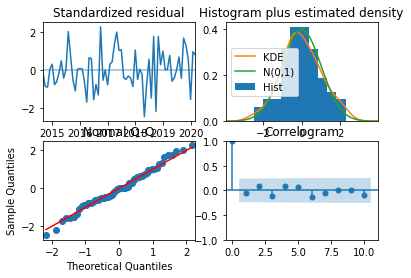

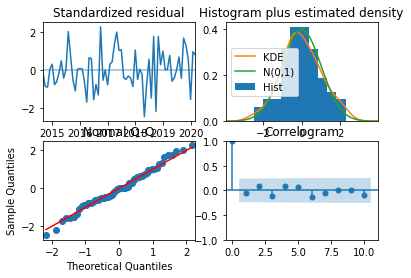

In [86]:
modelo_1.plot_diagnostics()

In [87]:
d = {'activar': data3.iloc[:88,9] ,'estimados': modelo_1.fittedvalues}
ajuste = pd.DataFrame(d)
#data_mora.loc[:,'mora']
#print(len(vecm_res.resid[:,0]))
#print(data_mora.iloc[:82,0])
#ajuste.head()
#res.predict()
fig = px.line(
    data_frame=ajuste, 
)
fig.update_layout(title='Ajuste Ene-2014, Mar-2020')
fig.show()

In [29]:
#ajuste.plot()

In [90]:
from sklearn.metrics import mean_absolute_error
neg_mae = mean_absolute_error(data2.iloc[:67,0], modelo_1.fittedvalues)
print(neg_mae)
from sklearn.metrics import mean_squared_error
neg_msr = mean_squared_error(data2.iloc[:67,0], modelo_1.fittedvalues)
print(neg_msr)

9.38061775258721
89.33692152555298


In [55]:
import joblib
joblib.dump(modelo_mora, 'm_mora_pp.pkl')

['m_mora_pp.pkl']